In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [2]:
data=pd.read_csv("data/Data_For_Model.csv",index_col=0)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,total_sqft,total_sqft15
0,7129300520,-1.219602,-0.360264,-1.474021,-1.024220,-0.368444,-0.882793,0,-0.265547,-0.630613,-0.505274,-0.719609,-0.655898,-0.535113,-0.196675,98178,47.5112,-122.257,-0.939298,-0.289399,-0.690134,1.098833,-0.312788,-0.420250,-0.322666
1,6414100192,0.304766,-0.360264,0.287004,0.789831,-0.250721,0.977186,0,-0.265547,-0.630613,-0.505274,0.657624,0.324808,-0.672027,5.072365,98125,47.7210,-122.319,-0.368044,-0.165201,-0.690134,1.740754,-0.777156,-0.202960,-0.177812
2,5631500400,-1.421662,-1.456021,-1.474021,-1.559300,-0.046776,-0.882793,0,-0.265547,-0.630613,-1.474987,-1.289978,-0.655898,-1.288143,-0.196675,98028,47.7379,-122.233,1.313076,-0.138788,1.448994,-1.468851,1.080317,-0.133154,-0.087827
3,2487200875,0.623046,0.735492,1.343619,-0.006263,-0.416510,-0.882793,0,-0.265547,2.457736,-0.505274,-0.900458,1.575207,-0.192826,-0.196675,98136,47.5208,-122.393,-0.906655,-0.329986,-0.690134,1.740754,-0.777156,-0.410777,-0.361682
4,1954400510,0.169738,-0.360264,-0.065201,-0.371684,-0.188754,-0.882793,0,-0.265547,-0.630613,0.464440,-0.024037,-0.655898,0.560204,-0.196675,98074,47.6168,-122.045,-0.188507,-0.173693,1.448994,-1.468851,0.267672,-0.206750,-0.179422


In [3]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'total_sqft',
       'total_sqft15'],
      dtype='object')

In [4]:
data.drop(columns=['id', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'sqft_basement', 'yr_renovated', 'sqft_lot15', 'year', 'month', 'day', 'total_sqft',
       'total_sqft15'],inplace=True,axis=1)

In [5]:
data.shape

(20138, 11)

In [6]:
data.columns

Index(['price', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [7]:
#input features for model
X=data.drop(['price'],axis=1)
#output features for model
y=data['price']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)

print("By using neural networks we got:")
print("Training data accuracy:", mlp_reg.score(X_train_scaled, y_train))
print("Testing data accuracy:", mlp_reg.score(X_test_scaled, y_test))

By using neural networks we got:
Training data accuracy: 0.8676497083939875
Testing data accuracy: 0.8558658662833005


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Predict on the test set
y_pred = mlp_reg.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 0.38013064324866935
Mean Absolute Error (MAE): 0.2745886858463537
R-squared: 0.8558658662833005


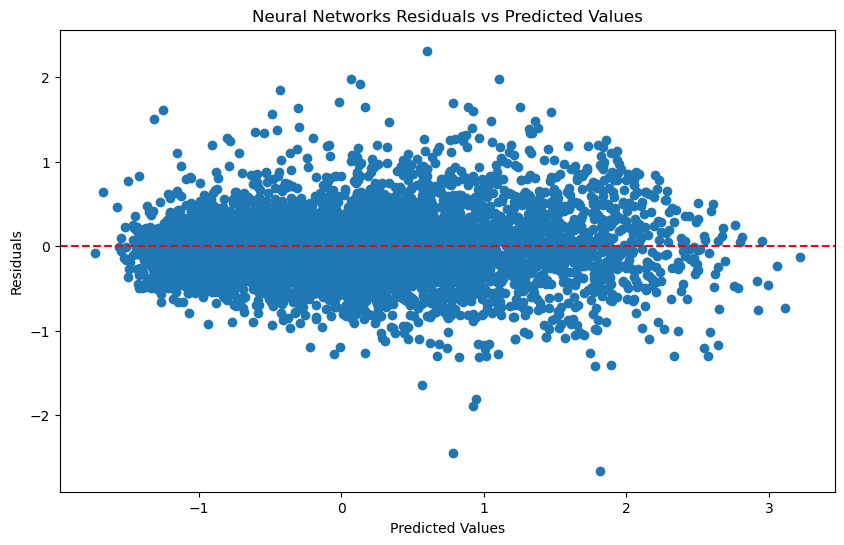

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Neural Networks Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [16]:
# Define a grid of hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [18]:
from sklearn.model_selection import GridSearchCV

# Set up GridSearchCV
grid_search = GridSearchCV(MLPRegressor(max_iter=500, random_state=42), param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='r2')

In [19]:
# Get the best parameters and the best MLP regressor
print("Best parameters found: ", grid_search.best_params_)
best_mlp_reg = grid_search.best_estimator_

Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [20]:
# Training accuracy
train_accuracy_tuned = best_mlp_reg.score(X_train_scaled, y_train)
print("Training data accuracy (Tuned):", train_accuracy_tuned)

# Testing accuracy
test_accuracy_tuned = best_mlp_reg.score(X_test_scaled, y_test)
print("Testing data accuracy (Tuned):", test_accuracy_tuned)

# Predict on the test set with the tuned model
y_pred_tuned = best_mlp_reg.predict(X_test_scaled)

# Calculate RMSE
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print("Root Mean Squared Error (Tuned):", rmse_tuned)

# Calculate MAE
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
print("Mean Absolute Error (Tuned):", mae_tuned)

# Calculate R-squared
r2_tuned = r2_score(y_test, y_pred_tuned)
print("R-squared (Tuned):", r2_tuned)

Training data accuracy (Tuned): 0.8792423872506037
Testing data accuracy (Tuned): 0.8637936468569356
Root Mean Squared Error (Tuned): 0.36952867259434075
Mean Absolute Error (Tuned): 0.2629377281656186
R-squared (Tuned): 0.8637936468569356
